# Защита персональных данных клиентов

## Проект:

Нужно защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось, без подбора наилучшего качества модели.

**Описание данных:**

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.


**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [82]:
dt = pd.read_csv('/datasets/insurance.csv')

In [83]:
display(dt.head(), dt.columns, dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

None

In [84]:
dt['Возраст'] = dt['Возраст'].astype(int)
dt['Зарплата'] = dt['Зарплата'].astype(int)

<AxesSubplot:>

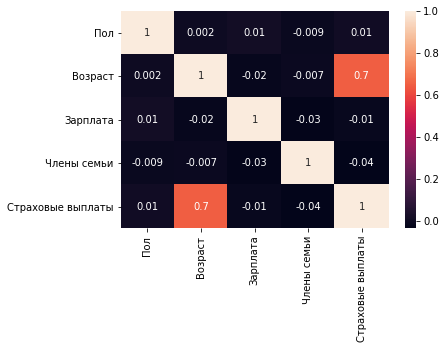

In [85]:
sns.heatmap(dt.corr(), annot = True, fmt = '.1g')

In [86]:
 dt.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [87]:
print(fc := dt.columns)
bins = [int(dt[x].max())+1 for x in dt.columns]
for i in range(len(bins)):
    x = bins[i]
    while x > 50:
        x //= 5
    bins[i] = x
print(bins)

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')
[2, 13, 25, 7, 6]


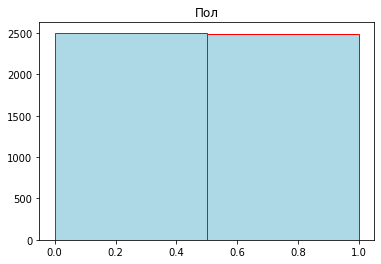

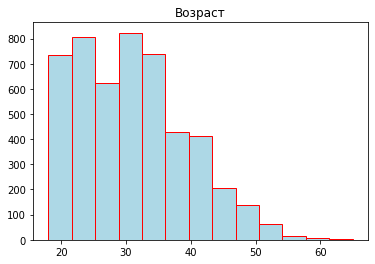

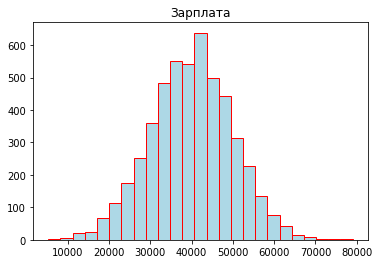

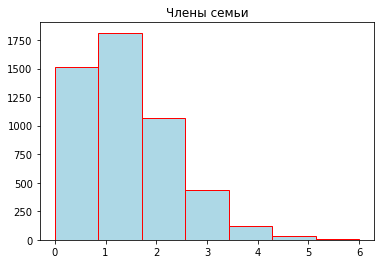

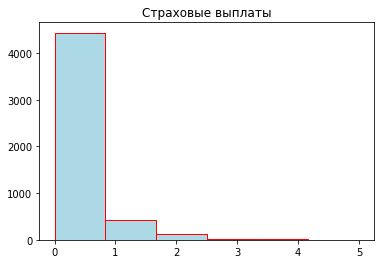

In [88]:

for i,m in zip(fc,bins):
    plt.hist(dt[i], bins = m, color = 'lightblue', ec = 'red')
    plt.title(i)
    plt.show()


In [89]:
display('Всего дубликатов:',dt.duplicated().sum())
display('Процент дублей от общего:',((dt.duplicated().sum() / dt.shape[0]) * 100),)

'Всего дубликатов:'

153

'Процент дублей от общего:'

3.06

## **Умножение матриц**

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки (является обратимой)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)


Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$


Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$



* **Обозначим предсказание с учётом умножение на обратимую матрицу:**
    
    
* $$a_p = X_i P w_p$$

    
***Введём формулу обучение с учётом умножения всех признаков на обратимую матрицу:**    

    
* $$w_p =  ((XP)^T (XP))^{-1} (XP)^T y$$

    
* **Раскроем все возможные скобки:**
    

* $$w_p = P^{-1} (X^T X)^{-1} P^{-1} P X^T y $$


*  **Сократим единичную матрицу:**  
    

* $$w_p = P^{-1} (X^T X)^{-1} X^T y$$

 
*  **Используем равенство: $$w = (X^T X)^{-1} X^T y $$**    
    
    
* $$ следовательно>  w_p = P^{-1} w $$
    



*  **Докажем равенство предсказаний изменённой и обычной линейной регрессии:**

    
Предсказание для обычной линейной регрессии:    
* $$a = Xw $$

    
Предсказание с признаками, умноженными на обратимую матрицу:
* $$a_p = X P w_p$$ 
    

* **Произведем подмену используя ревенство:** $$w_p = P^{-1} w $$
        
    
* $$a_p = X P w_p = X P P^{-1} w $$
    
   
 Составим полное равенство:   
   
    
* $$ a_p = X P w_p = X P P^{-1} w = Xw = a $$
    
    
 Из чего доказано, что эффективность линейной регрессии не изменится:    
    
    
* $$ a_p = a $$

## Алгоритм преобразования

~~**Алгоритм**~~


На основе доказательства из пункта 3:


Для защиты персональных данных клиентов будет произведено умножение мтрицы исходных данных на случайную матрицу эквивалентного размера, инициированную случайными весами, для которой сущуствует обратная матрица.

Такое перемножение не повлияет на результат работы алгоритма машинного обучения, однако, возобновить и интерпретировать данные клиентов без знания обратной матрицы будет практически невозможно. 


Для защиты персональных данных клиентов будет произведено умножение мтрицы исходных данных **X**(**i** x **j**) на случайную матрицу **P** (**j** x **j**), для которой сущуствует обратная матрица.

Исходя из теории в пункте 4 - такое перемножение не повлияет на результат работы алгоритма машинного обучения, однако, возобновить и интерпретировать данные клиентов без знания обратной матрицы будет практически невозможно. 


* **Алгоритм преобразования данных для решения задачи:**

1. Создаем функцию, которая будет генерировать случайную матрицу $$P$$ и обратную матрицу(для возвращения исходных данных) $$P^{-1}$$ до тех пор, пока она не окажется обратимой.


2. Преобразуем данные путем умножения данных клиентов **Х** на матрицу обратимую **P**.
3. Измеряем точность линейной регрессии на преобразованных и исходных данных.
4. Составлям заключение.

## Проверка алгоритма

Напомним:
* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

In [90]:
# Разделение данных
print((features := dt.drop(['Страховые выплаты'], axis = 1)).shape)
print((target := dt['Страховые выплаты']).shape)


(5000, 4)
(5000,)


In [91]:
# Создание обратимой матрицы в качестве будущего домножителя признаков
def go_go_inv_matrix():
    det = 0
    while det == 0:
        mtrx = np.random.normal(1667, size =(features.shape[1],features.shape[1]))
        det = np.linalg.det(mtrx)
        mtrx_inv = np.linalg.inv(mtrx)
    return mtrx, mtrx_inv

mtrx, mtrx_inv = go_go_inv_matrix()

# Простой просмотр получившейся матрицы:
print(mtrx,'\n', mtrx_inv)


[[1666.90541792 1667.92555875 1667.1200941  1666.13042487]
 [1667.55054371 1667.3852692  1666.78923763 1666.0065277 ]
 [1667.50367378 1667.89081335 1670.2356388  1666.00990583]
 [1667.5984896  1667.38466101 1666.92002575 1668.32831796]] 
 [[-0.82599054  1.03702768 -0.05165712 -0.15909677]
 [ 0.95099969 -0.37682125 -0.25813227 -0.31567643]
 [-0.15075831 -0.22034843  0.32733711  0.04371924]
 [ 0.02579847 -0.43980348 -0.01744001  0.43144211]]


In [92]:
# Создание новой матрицы признаков
# Умножаем матрицу признаков на обратимую матрицу
print((new_features := features.dot(mtrx_inv)).shape)

(5000, 4)


In [93]:
for matrix,name in zip([features, new_features],['old_features','new_features']):
    model = LinearRegression(normalize = True).fit(matrix, target)
    predictions = model.predict(matrix)
    print(name,'r2_score:', score := r2_score(target, predictions))

old_features r2_score: 0.42494550308169177
new_features r2_score: 0.42494550308148826


## Вывод

**На основе эквивалентных результатов точности двух наборов данных:**

* Алгоритм для защиты персональных данных клиентов был успешно создан и протестирован.